# Домашнее задание 2 - EDA

### __Оценки-баллы__: 
- 1: 01-02
- 2: 03-04
- 3: 05-06
- 4: 07-08
- 5: 09-10
- 6: 11-12
- 7: 13-14
- 8: 15-16
- 9: 17-18
- 10: 19-25

__DL (срок сдачи ДЗ)__: 22.12.2021 22:00. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw4_5_ivanov_i_i.ipynb

### Задание 1 [20]

Используя датасет "pimdb.csv", провести EDA. Выявить инсайты

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [6]:
df = pd.read_csv("pimdb.csv", sep=';')

In [7]:
df

,Title,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,der vagabund und das kind,8.4,40550.0,3240.0,video.movie,1.0,0.0,19.0,96.0,85.0
1,goldrausch,8.3,45319.0,5700.0,video.movie,2.0,1.0,35.0,NaN,122.0
2,metropolis,8.4,81007.0,9180.0,video.movie,3.0,4.0,67.0,428.0,376.0
3,der general,8.3,37521.0,6420.0,video.movie,1.0,1.0,53.0,123.0,219.0
4,lichter der gro stadt,8.7,70057.0,5220.0,video.movie,2.0,0.0,38.0,187.0,186.0
...,...,...,...,...,...,...,...,...,...,...
14756,peep show sectioning tv episode,7.7,135.0,1440.0,video.episode,0.0,0.0,0.0,0.0,0.0
14757,playhouse the miracle worker tv episode,7.3,8.0,5400.0,video.episode,0.0,0.0,0.0,0.0,0.0
14758,private screenings robert mitchum and jane rus...,7.0,20.0,3600.0,video.episode,0.0,0.0,0.0,0.0,3.0
14759,providence all the king s men tv episode,NaN,NaN,3600.0,video.episode,0.0,0.0,0.0,0.0,0.0


In [8]:
df.dropna(subset=['ImdbRating'])

,Title,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,der vagabund und das kind,8.4,40550.0,3240.0,video.movie,1.0,0.0,19.0,96.0,85.0
1,goldrausch,8.3,45319.0,5700.0,video.movie,2.0,1.0,35.0,NaN,122.0
2,metropolis,8.4,81007.0,9180.0,video.movie,3.0,4.0,67.0,428.0,376.0
3,der general,8.3,37521.0,6420.0,video.movie,1.0,1.0,53.0,123.0,219.0
4,lichter der gro stadt,8.7,70057.0,5220.0,video.movie,2.0,0.0,38.0,187.0,186.0
...,...,...,...,...,...,...,...,...,...,...
14755,parker lewis der coole von der schule parker l...,7.6,16.0,1800.0,video.episode,0.0,0.0,0.0,0.0,1.0
14756,peep show sectioning tv episode,7.7,135.0,1440.0,video.episode,0.0,0.0,0.0,0.0,0.0
14757,playhouse the miracle worker tv episode,7.3,8.0,5400.0,video.episode,0.0,0.0,0.0,0.0,0.0
14758,private screenings robert mitchum and jane rus...,7.0,20.0,3600.0,video.episode,0.0,0.0,0.0,0.0,3.0


Раз во втором задании мы будем строить модель, то делать EDA по всем данным это неправильно. Надо сделать  разделение на трейн и тест и EDA делать по трейну

In [61]:
from sklearn.model_selection import train_test_split
df = df.dropna(subset=['ImdbRating'])
X = df.drop('ImdbRating', axis=1)
y = df['ImdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
df_train = X_train
df_train['ImdbRating'] = y_train

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 10165 to 2087
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10833 non-null  object 
 1   RatingCount        10840 non-null  float64
 2   Duration           10215 non-null  float64
 3   Type               10840 non-null  object 
 4   WinsCount          10824 non-null  float64
 5   NominationsCount   10830 non-null  float64
 6   PhotosCount        10830 non-null  float64
 7   NewsArticlesCount  10835 non-null  float64
 8   UserReviewsCount   10839 non-null  float64
 9   ImdbRating         10840 non-null  float64
dtypes: float64(8), object(2)
memory usage: 931.6+ KB


Столбцов с большим количеством пропусков нет, строки с пропуском в целевой переменной дропнули.

Только один столбец с текстом, остальные данные числовые. 

In [14]:
df_train.Type.value_counts()

video.movie      8668
video.tv         1232
video.episode     845
game               95
Name: Type, dtype: int64

Type - категориальная переменная с 4 вариантами. Потом закодируем этот столбец каким-нибудь способом

In [15]:
df_train.describe()

,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount,ImdbRating
count,1.084000e+04,10215.000000,10824.000000,10830.000000,10830.000000,10835.000000,10839.000000,10840.000000
mean,2.626617e+04,5648.824474,3.357816,4.751893,25.465743,267.665990,112.053603,6.865563
std,6.546561e+04,2747.186796,9.472716,15.364438,68.522653,1103.609772,233.603569,1.127373
min,5.000000e+00,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.070000e+02,4740.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.300000
50%,3.900000e+03,5760.000000,0.000000,0.000000,9.000000,13.000000,37.000000,7.000000
75%,2.056925e+04,6720.000000,3.000000,4.000000,28.000000,116.000000,113.000000,7.600000
max,1.183395e+06,68400.000000,220.000000,456.000000,2810.000000,32345.000000,3930.000000,9.900000


Построим график распределения целевой переменной

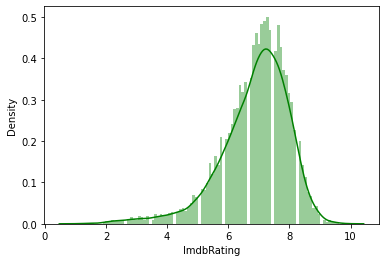

In [16]:
sns.distplot(df_train['ImdbRating'], color='g', bins=100, hist_kws={'alpha': 0.4});

Видно, что распределение смещено влево (отрицательная асимметрия) с выбросами в районе 10 и 1,2

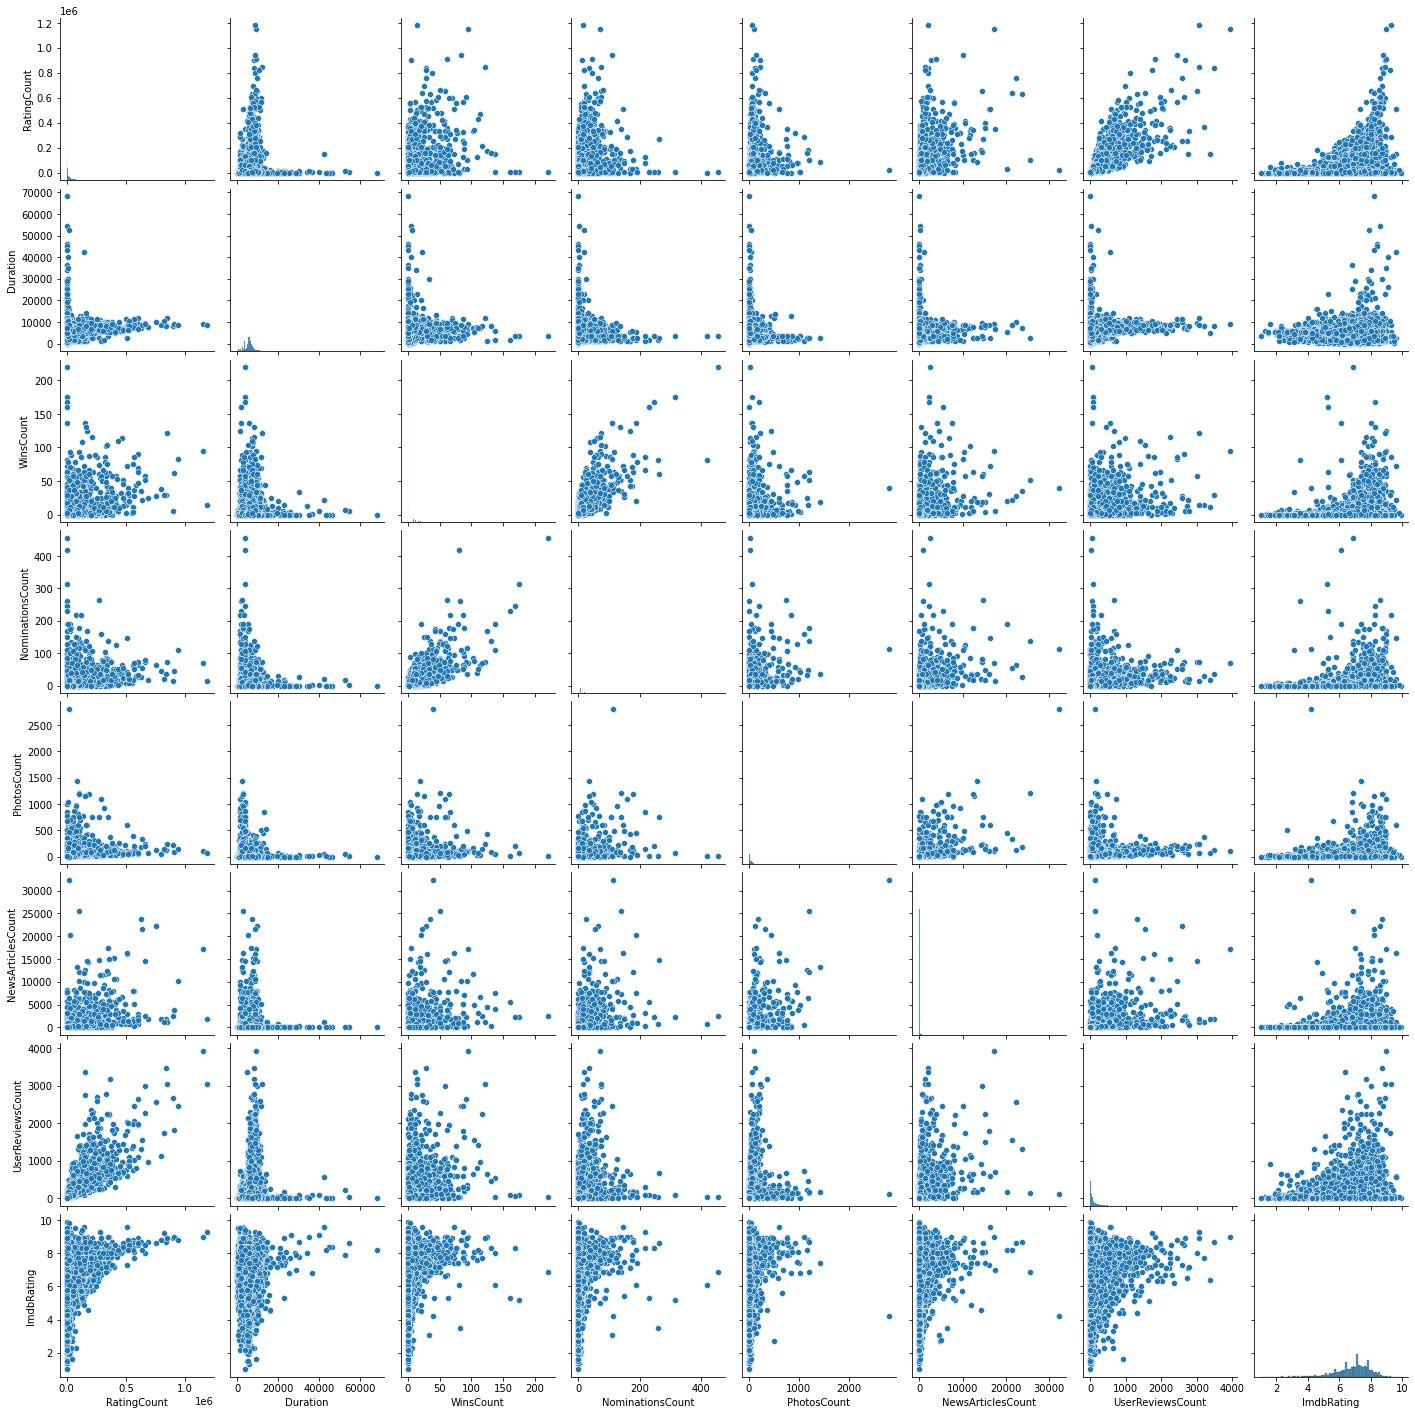

In [17]:
sns.pairplot(df_train)

In [31]:
df_log = df

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [32]:
df_log['Type'] = le.fit_transform(df_log.Type)

In [33]:
df_log = df_log.drop('Title', axis=1)

In [36]:
# df_log = np.log(df_log)

In [34]:
df_log.describe()

,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
count,13551.000000,1.355100e+04,12793.000000,13551.000000,13531.000000,13540.000000,13540.000000,13545.000000,13550.000000
mean,6.865707,2.642480e+04,5626.405378,2.017858,3.370926,4.918242,25.656056,269.662311,112.465018
std,1.119515,6.506456e+04,2702.125762,0.475812,9.587776,16.837669,67.766090,1093.021680,236.947762
min,1.000000,5.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,4680.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,7.000000,3.977000e+03,5760.000000,2.000000,0.000000,0.000000,9.000000,13.000000,37.000000
75%,7.600000,2.085850e+04,6720.000000,2.000000,3.000000,4.000000,29.000000,121.000000,114.000000
max,9.900000,1.183395e+06,68400.000000,3.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000


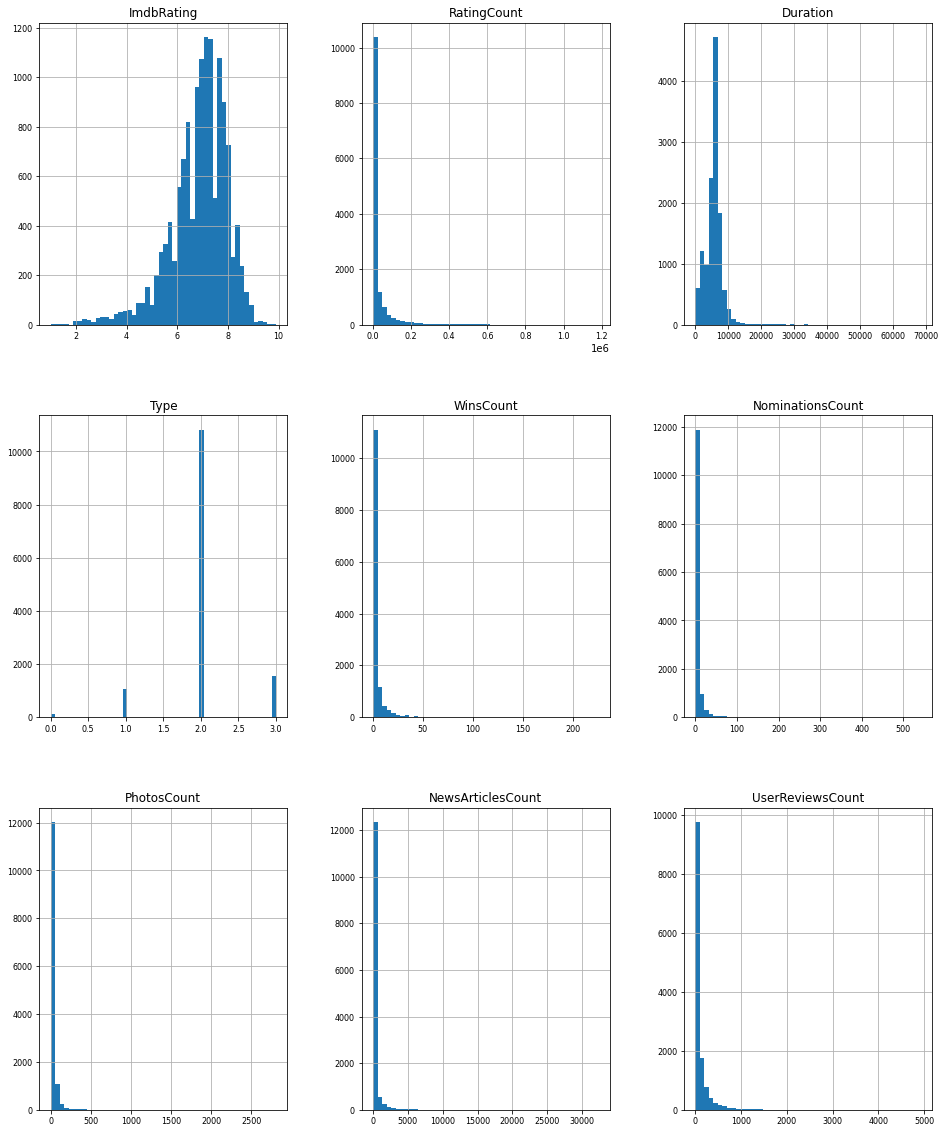

In [35]:
df_log.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Чтобы привести данные к нормальному распределению применим PowerTransformer. Отрицательных значений нет, поэтому он сразу заработает без ошибок

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [38]:
cols = df_log.columns
df_log[cols] = pd.DataFrame(
    pt.fit_transform(df_log[cols]), columns=cols
)


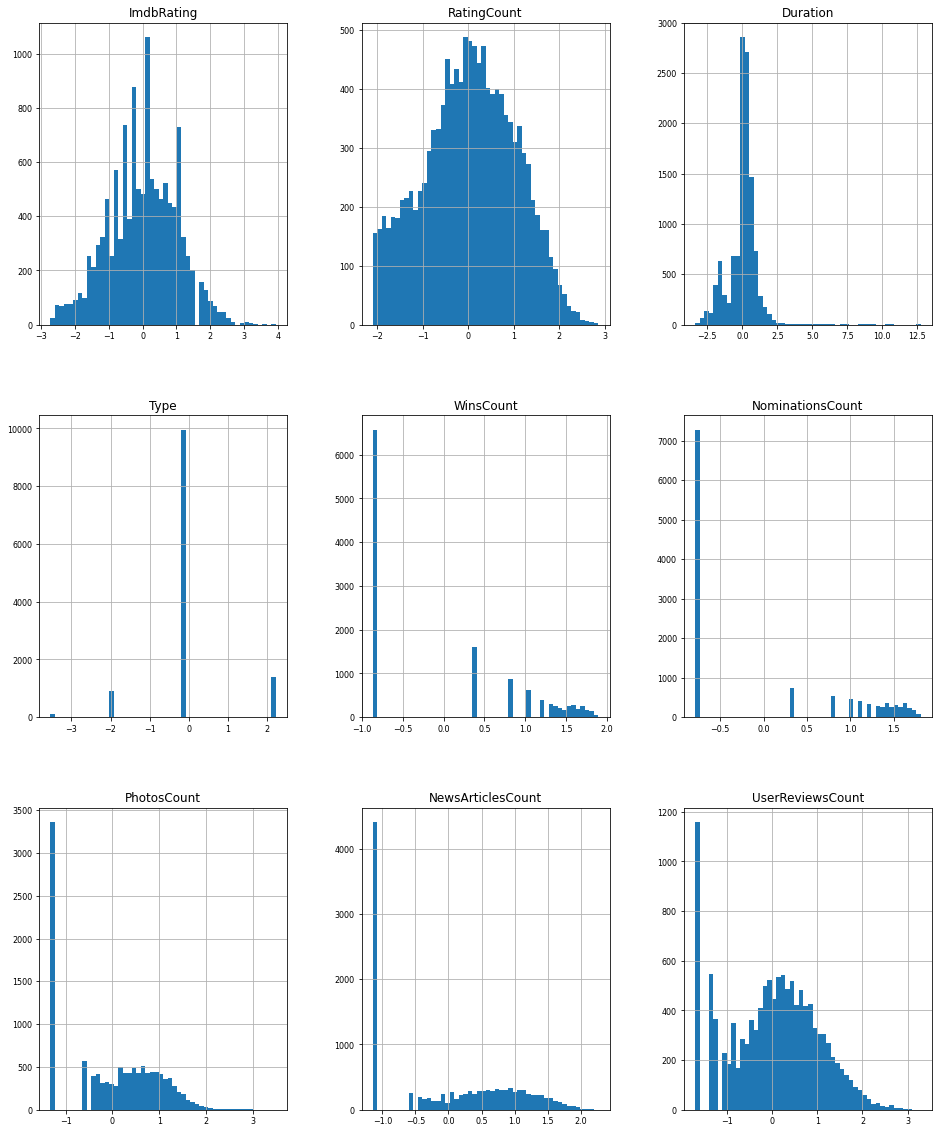

In [39]:
df_log.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
df_train.corr()

,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount,ImdbRating
RatingCount,1.000000,0.172436,0.419667,0.350015,0.335002,0.532198,0.833461,0.153932
Duration,0.172436,1.000000,0.110220,0.026007,0.012815,0.038794,0.198376,0.007335
WinsCount,0.419667,0.110220,1.000000,0.792180,0.261847,0.373209,0.381099,0.199201
NominationsCount,0.350015,0.026007,0.792180,1.000000,0.395616,0.452793,0.317840,0.140453
PhotosCount,0.335002,0.012815,0.261847,0.395616,1.000000,0.588705,0.299499,0.069887
NewsArticlesCount,0.532198,0.038794,0.373209,0.452793,0.588705,1.000000,0.446040,0.073962
UserReviewsCount,0.833461,0.198376,0.381099,0.317840,0.299499,0.446040,1.000000,0.079366
ImdbRating,0.153932,0.007335,0.199201,0.140453,0.069887,0.073962,0.079366,1.000000


In [40]:
df_log.corr()

,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
ImdbRating,1.000000,0.090741,-0.040043,-0.019470,0.276159,0.214439,0.027002,0.041264,0.019016
RatingCount,0.090741,1.000000,0.380493,0.162119,0.542681,0.566416,0.820108,0.815301,0.937799
Duration,-0.040043,0.380493,1.000000,-0.061289,0.270742,0.241523,0.274513,0.262578,0.407805
Type,-0.019470,0.162119,-0.061289,1.000000,0.186729,0.225451,0.224910,0.233303,0.166831
WinsCount,0.276159,0.542681,0.270742,0.186729,1.000000,0.848662,0.459578,0.506424,0.515758
NominationsCount,0.214439,0.566416,0.241523,0.225451,0.848662,1.000000,0.513119,0.555062,0.541774
PhotosCount,0.027002,0.820108,0.274513,0.224910,0.459578,0.513119,1.000000,0.816441,0.804692
NewsArticlesCount,0.041264,0.815301,0.262578,0.233303,0.506424,0.555062,0.816441,1.000000,0.803200
UserReviewsCount,0.019016,0.937799,0.407805,0.166831,0.515758,0.541774,0.804692,0.803200,1.000000


Есть сильная корреляция между количеством номинаций и побед, при этом корреляция между числом побед и рейтингом больше, чем между количеством номинаций и рейтингом, поэтому возможно количество номинаций надо будет дропнуть (мультиколлинеарность отрицательно влияет на работу модели).

Также есть сильная корреляция между количеством отзывов и количеством оценок. Может дропнем количество отзывов по той же причине, что описана выше.

In [23]:
import numpy as np

<AxesSubplot:>

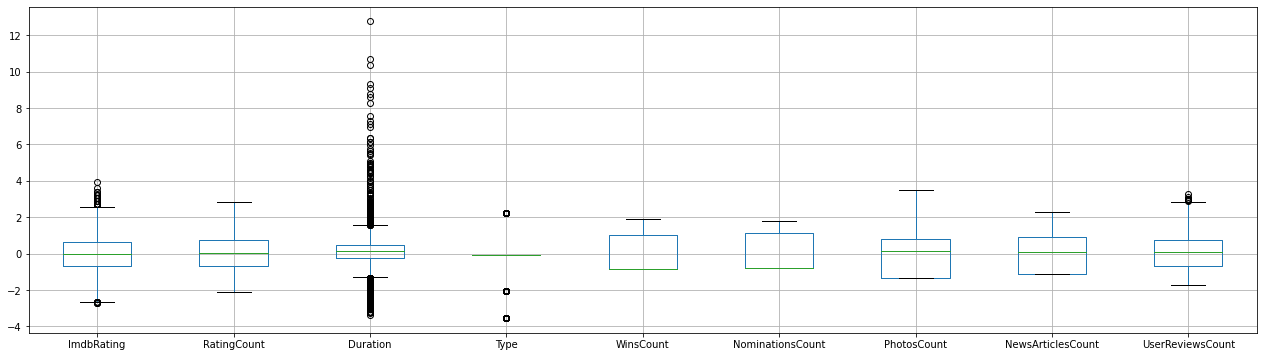

In [42]:
df_log.boxplot(figsize=(22,6))

In [99]:
df_log['Dur_q'] = pd.qcut(df_log['Duration'], 4, labels=False)

<AxesSubplot:>

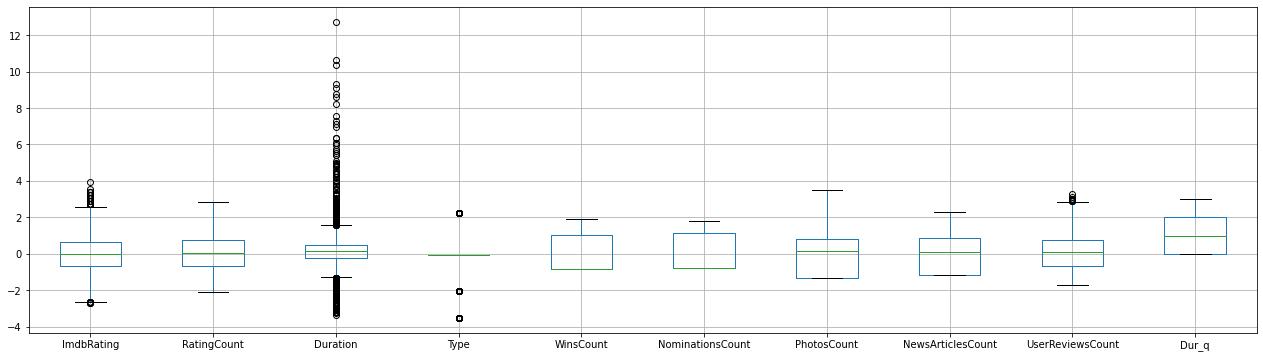

In [100]:
df_log.boxplot(figsize=(22,6))

### Задание 2 [5]*

Используя датасет "pimdb.csv", после EDA построить модель регрессии для предсказания рейтинга фильма ImdbRating

In [43]:
from sklearn.linear_model import LinearRegression

In [62]:
def preprocess(X_train):
    X_train = X_train.drop('Title', axis=1)
    X_train['Type'] = le.fit_transform(X_train.Type)
    X_train = X_train.fillna(X_train.median())
    return X_train    

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

In [60]:
X_train.value_counts()

RatingCount  Duration  Type  WinsCount  NominationsCount  PhotosCount  NewsArticlesCount  UserReviewsCount  ImdbRating
8.0          median    2     0.0        0.0               0.0          0.0                0.0               5.8           2
16.0         1800.0    1     0.0        0.0               0.0          0.0                0.0               7.0           2
5.0          median    2     0.0        0.0               0.0          0.0                0.0               6.2           2
10.0         3600.0    1     0.0        0.0               0.0          0.0                0.0               7.4           2
50.0         3720.0    1     0.0        0.0               0.0          0.0                1.0               7.4           2
                                                                                                                         ..
1240.0       5460.0    2     0.0        0.0               7.0          0.0                36.0              6.4           1
             

In [ ]:
X_train = preprocess(X_train)

In [82]:
reg = LinearRegression().fit(X_train, y_train)

In [65]:
X_test = preprocess(X_test)

In [83]:
print(reg.score(X_train, y_train))

0.06399028762633341


In [84]:
print(reg.score(X_test, y_test))

0.06382813384489039


In [85]:
y_pred = reg.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(y_test, y_pred, squared=True)

1.1293310522384545

In [87]:
y_pred_0 = reg.predict(X_train)

In [105]:
mean_squared_error(y_train, y_pred_0, squared=True)

1.1839885748885282

In [107]:
y_test

9867     7.6
4736     7.8
12598    7.1
8126     5.8
1496     7.2
        ... 
1094     7.8
3087     7.4
11159    6.2
5837     6.4
11219    4.6
Name: ImdbRating, Length: 2711, dtype: float64

In [108]:
y_pred

array([6.64995706, 6.9464783 , 6.6349745 , ..., 6.76463904, 6.88413686,
       6.84154734])

In [109]:
df_result = pd.DataFrame()
df_result['true'] = y_test
df_result['pred'] = y_pred
df_result['delta'] = abs(df_result['true'] - df_result['pred'])

In [112]:
df_result

,true,pred,delta
9867,7.6,6.649957,0.950043
4736,7.8,6.946478,0.853522
12598,7.1,6.634975,0.465025
8126,5.8,6.856352,1.056352
1496,7.2,6.751974,0.448026
...,...,...,...
1094,7.8,7.638385,0.161615
3087,7.4,6.872191,0.527809
11159,6.2,6.764639,0.564639
5837,6.4,6.884137,0.484137


In [116]:
import math

In [117]:
math.sqrt(df_result['delta'].sum() / len(df_result))

0.8942384820425197

In [128]:
df_result[df_result['delta'] > 5]

,true,pred,delta
9105,2.1,7.131921,5.031921
13581,1.4,6.792356,5.392356


<AxesSubplot:>

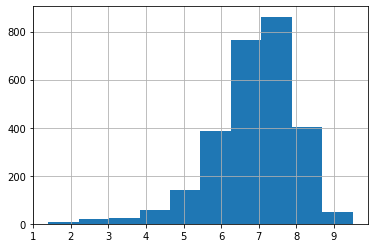

In [125]:
df_result['true'].hist()

<AxesSubplot:>

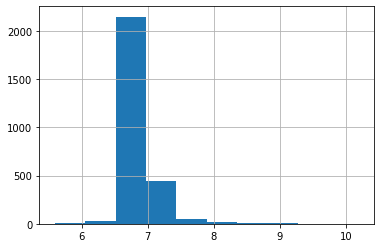

In [124]:
df_result['pred'].hist()

In [1]:
def split_data(df):
    df = df.dropna(subset=['ImdbRating'])
    X = df.drop('ImdbRating', axis=1)
    y = df['ImdbRating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [129]:
df

,Title,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,der vagabund und das kind,8.4,40550.0,3240.0,2,1.0,0.0,19.0,96.0,85.0
1,goldrausch,8.3,45319.0,5700.0,2,2.0,1.0,35.0,NaN,122.0
2,metropolis,8.4,81007.0,9180.0,2,3.0,4.0,67.0,428.0,376.0
3,der general,8.3,37521.0,6420.0,2,1.0,1.0,53.0,123.0,219.0
4,lichter der gro stadt,8.7,70057.0,5220.0,2,2.0,0.0,38.0,187.0,186.0
...,...,...,...,...,...,...,...,...,...,...
14755,parker lewis der coole von der schule parker l...,7.6,16.0,1800.0,1,0.0,0.0,0.0,0.0,1.0
14756,peep show sectioning tv episode,7.7,135.0,1440.0,1,0.0,0.0,0.0,0.0,0.0
14757,playhouse the miracle worker tv episode,7.3,8.0,5400.0,1,0.0,0.0,0.0,0.0,0.0
14758,private screenings robert mitchum and jane rus...,7.0,20.0,3600.0,1,0.0,0.0,0.0,0.0,3.0


In [130]:
def split_data_2(df):
    df = df.dropna(subset=['ImdbRating'])
    X = df.drop(['ImdbRating', 'NominationsCount', 'UserReviewsCount'], axis=1)
    y = df['ImdbRating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [136]:
def preprocess_2(X_train):
    X_train = X_train.drop('Title', axis=1)
    X_train['Type'] = le.fit_transform(X_train.Type)    
    cols = X_train.columns
    X_train[cols] = pd.DataFrame(
        pt.fit_transform(X_train[cols]), columns=cols
    )
    X_train = X_train.fillna(X_train.median())

    return X_train    

In [2]:
X_train, X_test, y_train, y_test = split_data_2(df)

NameError: name 'split_data_2' is not defined

In [138]:
X_train = preprocess_2(X_train)
X_test = preprocess_2(X_test)

In [142]:
X_test

,RatingCount,Duration,Type,WinsCount,PhotosCount,NewsArticlesCount
2049,-1.443486,-1.082187,-2.002152,-0.858589,-1.323978,-1.137839
7047,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
11810,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
653,-0.586775,-1.828917,-2.002152,-0.858589,-0.084494,-1.137839
7799,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
...,...,...,...,...,...,...
7489,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
5321,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
6128,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
9105,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602


In [147]:
X_train

,RatingCount,Duration,Type,WinsCount,PhotosCount,NewsArticlesCount
8537,0.296397,0.731128,-0.08165,0.357275,-0.303766,0.354064
2634,0.299283,0.154292,-0.08165,-0.866938,0.128034,0.654191
14218,0.022072,0.154292,-0.08165,-0.866938,0.128034,0.110347
14014,0.022072,0.154292,-0.08165,-0.866938,0.128034,0.110347
4016,-0.544602,-0.194621,-0.08165,-0.866938,-1.321894,-1.143586
...,...,...,...,...,...,...
10562,0.171899,0.176741,-0.08165,-0.866938,-0.010540,0.367317
12474,0.022072,0.154292,-0.08165,-0.866938,0.128034,0.110347
13153,0.022072,0.154292,-0.08165,-0.866938,0.128034,0.110347
3870,0.942837,0.353090,-0.08165,0.806436,1.804578,0.581137


In [148]:
X_test

,RatingCount,Duration,Type,WinsCount,PhotosCount,NewsArticlesCount
2049,-1.443486,-1.082187,-2.002152,-0.858589,-1.323978,-1.137839
7047,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
11810,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
653,-0.586775,-1.828917,-2.002152,-0.858589,-0.084494,-1.137839
7799,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
...,...,...,...,...,...,...
7489,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
5321,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
6128,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602
9105,-0.007363,0.163588,-0.069164,-0.858589,0.072454,0.101602


In [145]:
reg_2 = LinearRegression().fit(X_train, y_train)

In [149]:
y_pred_1 = reg_2.predict(X_test)

In [152]:
mean_squared_error(y_test, y_pred_1, squared=True)

1.22742565046812

In [153]:
print(reg_2.score(X_test, y_test))

0.007315159105393598


In [154]:
def get_result_df(y_test, y_pred):
    df_result = pd.DataFrame()
    df_result['true'] = y_test
    df_result['pred'] = y_pred
    df_result['delta'] = abs(df_result['true'] - df_result['pred'])
    return df_result

In [155]:
df_result_2 = get_result_df(y_test, y_pred_1)

In [156]:
df_result_2

,true,pred,delta
2049,7.7,6.912657,0.787343
7047,8.0,6.801685,1.198315
11810,6.6,6.801685,0.201685
653,7.8,6.908871,0.891129
7799,7.2,6.801685,0.398315
...,...,...,...
7489,8.0,6.801685,1.198315
5321,8.1,6.801685,1.298315
6128,7.3,6.801685,0.498315
9105,2.1,6.801685,4.701685


In [167]:
df_result_2.delta.max()

5.401684840622945